# **Customer-Churn-Predictor**

## 1. Business Understanding

Customer churn is a critical challenge faced by businesses across various industries.<br>In an increasingly competitive market, retaining customers is more cost-effective than acquiring new ones.<br>Therefore, understanding and predicting customer churn has become a strategic priority for businesses aiming to enhance customer retention and maximize revenue.

Customer churn prediction is an essential aspect of business strategy, particularly for companies operating in highly competitive markets. Churn, the phenomenon where customers discontinue their subscription or service, directly impacts revenue and growth potential.<br>By accurately predicting which customers are likely to churn, businesses can implement targeted strategies to retain these customers, thereby enhancing customer loyalty and increasing revenue.

This project aims to develop a predictive model to identify customers at risk of churning. By leveraging historical customer data and advanced machine learning techniques, we will uncover patterns and factors contributing to churn.<br>These insights will guide the development of proactive retention strategies, ensuring the business can mitigate churn effectively.

### 1.1. Hypothesis Testing
**Null Hypothesis (Ho)**: The total amount charged to a customer has no statistical significant influence on wether the customer will churn or not 

**Alternate Hypothesis (Ha)**: The total amount charged to a customer has statistical significant influence on whether the customer will churn or not.

### 1.2. Analytical Questions
1. Which customer is most likely to churn?<br>
a) Perform statistical analysis tests for for the assumption that Churn is not influenced by customer demographics.<br>
b) Calculate the churn rate for each gender<br>
c) Calculate the churn rate for each SeniorCitizen<br>
d) Calculate the churn rate for customers with Partners<br>
e) Calculate the churn rate for customers with Dependents<br>
2. Identify which service is associated with customer churning<br>
a) Perform statistical test on services presumed to be associated with customer churning<br>
3. What internet services is most likely to have the most loyal customers?<br>
4. What is the reason behind a particular internet service recording high churn rate?<br>
5. How does tenure influence customer churn?

## 2. Data Understanding
Our dataset contains various customer attributes that can help us understand and predict customer churn. Each column represents a different aspect of the customer's profile, service usage, and payment behavior. The columns in our dataset are:

`Feature Description`:
- **customerID**: Unique identifier for each customer.
- **gender**: Customer's gender.
- **SeniorCitizen**: Indicates if the customer is a senior citizen (1) or not (0).
- **Partner**: Indicates if the customer has a partner.
- **Dependents**: Indicates if the customer has dependents.
- **tenure**: Number of months the customer has stayed with the company.
- **PhoneService**: Indicates if the customer has a phone service.
- **MultipleLines**: Indicates if the customer has multiple phone lines.
- **InternetService**: Type of internet service the customer has (e.g., DSL, Fiber optic, None).
- **OnlineSecurity**: Indicates if the customer has online security add-on.
- **OnlineBackup**: Indicates if the customer has online backup add-on.
- **DeviceProtection**: Indicates if the customer has device protection add-on.
- **TechSupport**: Indicates if the customer has tech support add-on.
- **StreamingTV**: Indicates if the customer has streaming TV service.
- **StreamingMovies**: Indicates if the customer has streaming movies service.
- **Contract**: Type of contract the customer has (e.g., month-to-month, one year, two years).
- **PaperlessBilling**: Indicates if the customer uses paperless billing.
- **PaymentMethod**: Method of payment used by the customer (e.g., electronic check, mailed check, bank transfer, credit card).
- **MonthlyCharges**: The amount charged to the customer monthly.
- **TotalCharges**: The total amount charged to the customer.
- **Churn**: Indicates if the customer has churned (Yes) or not (No).

### 2.1. Data Collection

### Import libraries

In [45]:
# Data manupulation packages
import pandas as pd
import numpy as np

# Data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# Utility packages
import os
import re
import pyodbc
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu
from dotenv import dotenv_values
import warnings
warnings.filterwarnings("ignore")

### Load Environment Variables and Create SQL Server Connection

In [8]:
# Get the current working directory
current_dir = os.getcwd()
# Construct the path to the .env file located in the 'env_files' directory one level up
dotenv_path = os.path.join(current_dir, '..', 'env_files', '.env')

# Load the .env file
environment_variables = dotenv_values(dotenv_path)
# Access variables from .env file
server = environment_variables.get("SERVER_NAME")
user_name = environment_variables.get("USER_NAME")
password = environment_variables.get("PASSWORD")
database = environment_variables.get("DATABASE_NAME")

In [9]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};UID={user_name};DATABASE={database};PWD={password}"

# Connect to the server using pyodbc
connection = pyodbc.connect(connection_string)

### 2.2. Load Dataset

In [10]:
# Retrieve table from database
sql_querry = "SELECT* FROM dbo.LP2_Telco_churn_first_3000"

# Retrieve dataset from database with connection created
df_first = pd.read_sql(sql_querry, connection)

# Load csv and xlsx files
df_second = pd.read_csv("../data/LP2_Telco-churn-second-2000.csv")
df_third = pd.read_excel("../data/Telco-churn-last-2000.xlsx")

In [11]:
# Preview first dataframe
df_first.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True


In [12]:
# Preview second dataframe
df_second.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No


### 2.3. Exploratory Data Analysis
#### 2.3.1. Data Quality and Assessment
#### **`First Dataframe`**

In [13]:
# Check characteristics of dataframe
print(f"{df_first.info()}\n{'Null Value Percentage'.center(50, '=')}\n{df_first.isna().mean().mul(100)}\n{'='*50}\nThere are {df_first.duplicated().sum()} duplicated rows present")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


We replace True and False entries in the first dataframe with Yes and No respectively

In [14]:
# Define the change_bool function
def change_bool(df):
    """
    Returns a DataFrame with True and False entries replaced by Yes and No respectively
    """
    for column in df.columns:
        df[column] = df[column].map(lambda v: "Yes" if v is True else "No" if v is False else v)
    return df

# Apply the change_bool function using pipe
df_first = df_first.pipe(change_bool)
df_first.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,None,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes


#### **`Second Dataframe`**

In [15]:
# Check characteristics of dataframe
print(f"{df_second.info()}\n{'Null Value Percentage'.center(50, '=')}\n{df_second.isna().mean().mul(100)}\n{'='*50}\nThere are {df_second.duplicated().sum()} duplicated rows present")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


filter out non-numeric entries present in the TotalCharges column 

In [16]:
pattern = r'[^0-9.]'
df_second.loc[df_second["TotalCharges"].str.contains(pattern, regex = True)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
1670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No
1754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No


In [17]:
# Replace all empty entries with NAN and convert datatype to float
df_second["TotalCharges"] = df_second["TotalCharges"].replace(" ", np.nan).astype(float)

# Replace 0 and 1 in the SeniorCitizen column with No and Yes respectively
df_second["SeniorCitizen"] = df_second["SeniorCitizen"].replace(1, "Yes")
df_second["SeniorCitizen"] = df_second["SeniorCitizen"].replace(0, "No")

# Preview dataframe
df_second.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,No,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,No,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,No,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No


Check for standardisation in column names

In [18]:
print(df_first.columns)
print(df_second.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


#### **`Concatenated Dataset`**<br>

Now that data entries of both datasets are consistent and column names are standardised, we then concatenate both dataframes   

In [19]:
# Concatenate the first and second datasets
df_combined = pd.concat([df_first, df_second], axis = 0)
# Reset index
df_combined.reset_index(drop = True, inplace = True)
df_combined.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,None,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes


In [20]:
# Check characteristics of dataframe
print(f"{df_combined.info()}\n{'Null Value Percentage'.center(50, '=')}\n{df_combined.isna().mean().mul(100)}\n{'='*50}\nThere are {df_combined.duplicated().sum()} duplicated rows present")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   object 
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [21]:
des_stats = df_combined.describe().T.style.background_gradient(cmap = "YlOrRd")
des_stats

,count,mean,std,min,25%,50%,75%,max
tenure,5043.000000,32.576641,24.529807,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,5043.000000,65.090214,30.068133,18.400000,35.775000,70.550003,90.050003,118.650002
TotalCharges,5035.000000,2302.062861,2269.483576,18.799999,417.675003,1401.150024,3862.000000,8670.100000


#### 2.3.2. Univariate Analysis

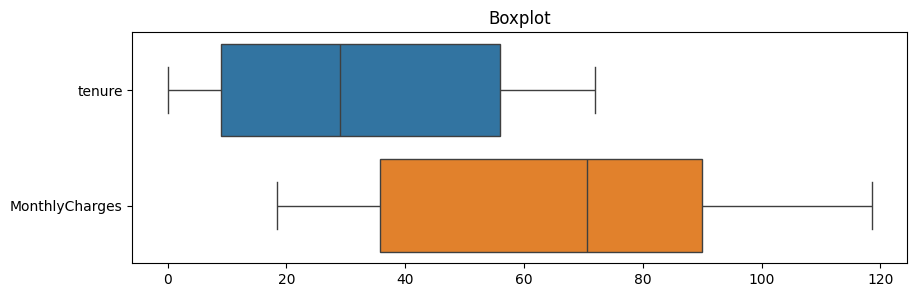

In [22]:
plt.figure(figsize = (10, 3))
sns.boxplot(df_combined.drop(["TotalCharges"], axis = 1), orient = "h")
plt.title("Boxplot")
plt.show()


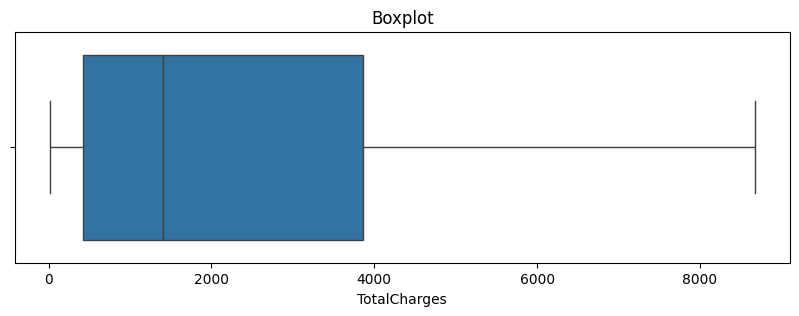

In [23]:
plt.figure(figsize = (10, 3))
sns.boxplot(df_combined["TotalCharges"], orient = "h")
plt.title("Boxplot")
plt.show()

#### **Key Insights**:
- There are no apparent outliers in tenure, MonthlyCharges, and TotalCharges. Their absence means that the data is more indicative of typical conditions, reducing the risk of basing decisions on anomalous or non-representative data points.<br>
- tenure, MonthlyCharges, and TotalCharges are not normally distributed and hence need to be transformed for statistical testing and parametric machine learning model.

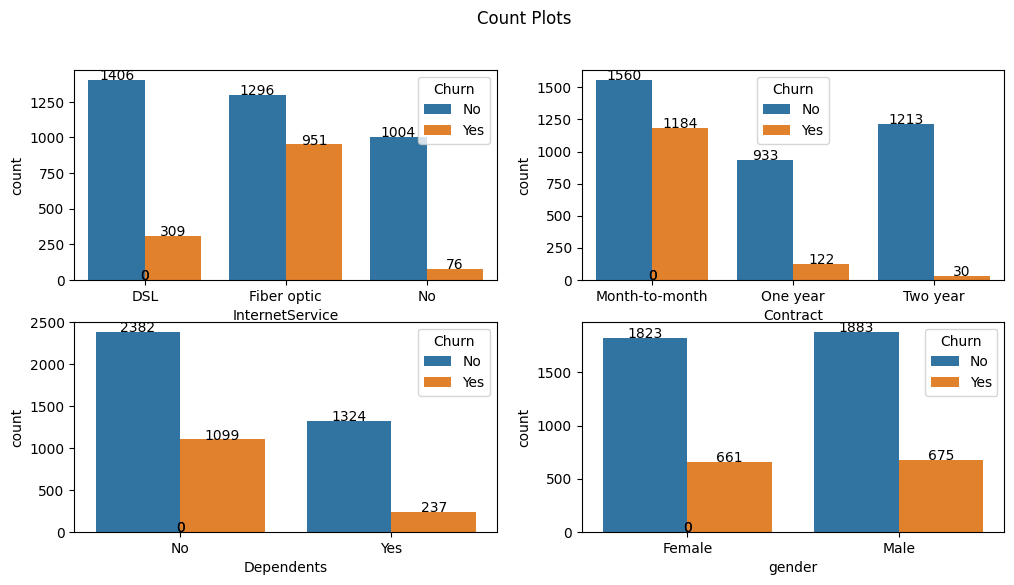

In [24]:
# Set the figure size and create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# Plot each subplot
sns.countplot(data=df_combined, x='InternetService', hue='Churn', ax=axes[0, 0])
sns.countplot(data=df_combined, x='Contract', hue='Churn', ax=axes[0, 1])
sns.countplot(data=df_combined, x='Dependents', hue='Churn', ax=axes[1, 0])
sns.countplot(data=df_combined, x='gender', hue='Churn', ax=axes[1, 1])

# Flatten axes array for easy indexing
axes = axes.flatten()

# Annotate each subplot
for ax in axes:
    for bar in ax.patches:
        h = bar.get_height()
        w = bar.get_width()
        x, y = bar.get_xy()
        ax.annotate(f"{int(h)}", (x + w/2, y + h*1.001), ha = "center")

fig.suptitle('Count Plots')
plt.show()

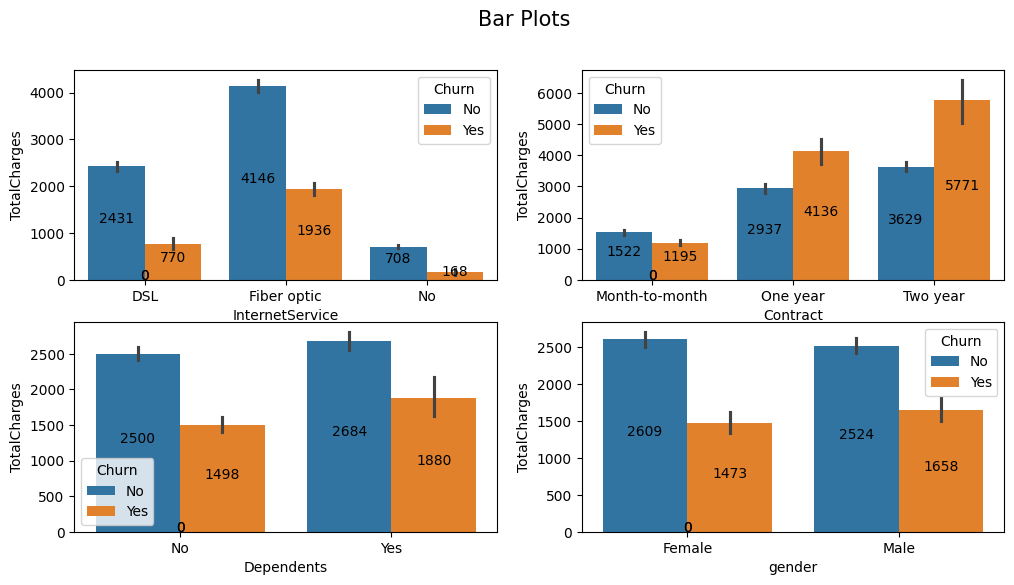

In [25]:
# Set the figure size and create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))

# Flatten axes array for easy indexing
axes = axes.flatten()

# Plot each subplot
sns.barplot(data=df_combined, x="InternetService", y = "TotalCharges", hue="Churn", ax=axes[0])
sns.barplot(data=df_combined, x="Contract", y = "TotalCharges", hue="Churn", ax=axes[1])
sns.barplot(data=df_combined, x="Dependents", y = "TotalCharges", hue="Churn", ax=axes[2])
sns.barplot(data=df_combined, x="gender", y = "TotalCharges", hue="Churn", ax=axes[3])

# Set the title for the entire figure
fig.suptitle("Bar Plots", fontsize=15)

# Annotate each subplot
for ax in axes:
    for bar in ax.patches:
        h = bar.get_height()
        w = bar.get_width()
        x, y = bar.get_xy()
        ax.annotate(f"{int(h)}", (x + w/2, y + h/2), ha = "center")

plt.show()

#### 2.3.3. Bi-variate Analysis

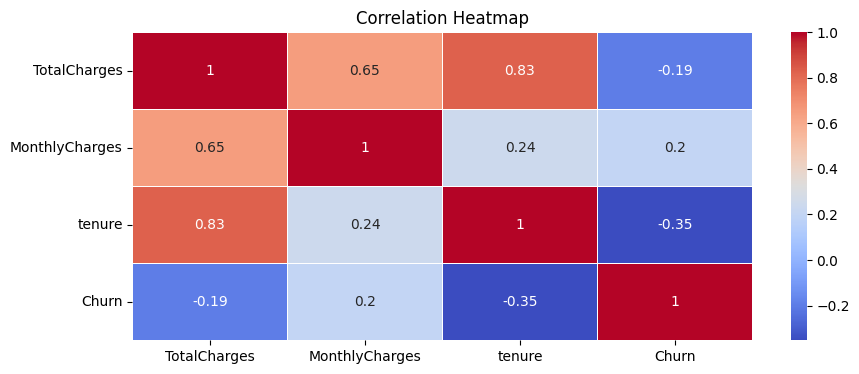

In [26]:
# Extract all yes and no columns
df_filter = df_combined[["TotalCharges", "MonthlyCharges", "tenure", "Churn"]]
# Drop null values
df_filter.dropna(inplace = True)

# Encode categorical values in churn colum
df_filter["Churn"] = df_filter["Churn"].map({"Yes": 1, "No": 0})

# Calculate the correlation coefficients
corr = df_filter.corr()

# Set the figure size and create subplots
plt.figure(figsize=(10, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


#### **Key Insights**:
- tenure and TotalCharges (0.83): This correlation is a very strong positive, indicating that as tenure increases, total charges naturally tend to increase as well, reflecting accumulated charges over time.<br>
- TotalCharges and MonthlyCharges: (0.65) This value indicates a strong positive correlation, indicating that customers with higher total charges tend to also have higher monthly charges. This makes sense, as customers who use the service more will incur greater overall charges.<br>
- Churn and MonthlyCharges (0.2): The correlation between churn and monthly charges is weak and positive, indicating that as monthly charges increases, customer churn also increases.
- Churn and tenure (-0.35): The correlation between churn and tenure is weak negative, indicating that as tenure decreases, customer churn also increases

#### 2.3.4. Multi-variate Analysis

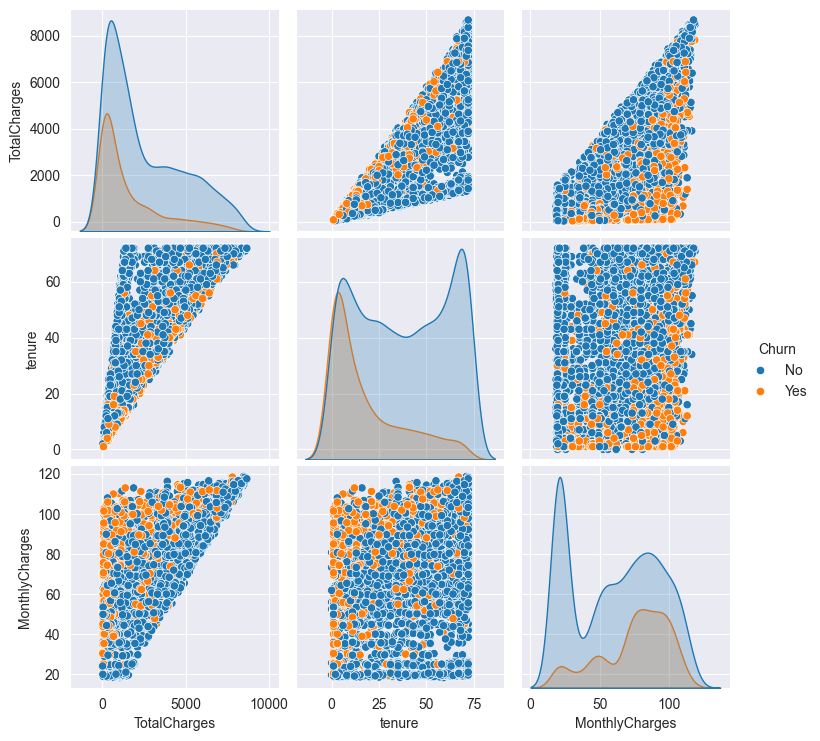

In [27]:
# Set style
sns.set_style("darkgrid")

selected_columns = df_combined[["Churn", "TotalCharges", "tenure", "MonthlyCharges"]]

# Plot pairplot using the selected columns
sns.pairplot(selected_columns, hue = "Churn")
plt.show()

#### Observation
1. **Total Charges vs. Tenure:**
- There is a positive correlation between TotalCharges and tenure, indicating that customers who have been with the company longer have higher total charges.
- Churned customers appear throughout the tenure range but are more concentrated at lower tenure values, suggesting that customers who churn often do so earlier in their relationship with the company.
2. **Total Charges vs. Monthly Charges:**
- TotalCharges increases with MonthlyCharges, as expected.
- Churned customers are spread across the MonthlyCharges range, with a noticeable number of churns at higher MonthlyCharges.
3. **Tenure vs. Monthly Charges:**
- Customers with shorter tenure (newer customers) have churn occurrences across different levels of MonthlyCharges.
- There is a higher concentration of churn at shorter tenures, irrespective of MonthlyCharges.
4. **Distributions:**
The histograms on the diagonal show the distribution of each variable split by churn status:
- `TotalCharges`: Churned customers tend to have lower total charges.
- `Tenure`: Churned customers are more prevalent at shorter tenures.
- `MonthlyCharges`: There is a relatively higher density of churned customers at higher monthly charges, but churn occurs across all charge levels.

#### Key Insights:
- Tenure is a significant factor in churn. Customers with shorter tenure are more likely to churn.
- TotalCharges is also a relevant factor, with lower total charges associated with higher churn, likely due to shorter tenure.
- MonthlyCharges shows that higher charges might be linked to higher churn, though churn occurs across all charge levels.

#### Duplicate the dataframe to answer analytical questions;
- create a deep copy of the DataFrame, so that changes in one does not affect the other
- Name the duplicated dataframe "df_copy"

In [28]:
# Duplicate Dataframe 
df_copy = df_combined.copy(deep = True)

# Define a function to fill null values in a DataFrame
def fill_null_values(df):
    """
    Returns a DataFrame with null values filled
    """
    # Iterate over each column in the DataFrame
    for col in df.columns:
        # Check if the column data type is object (i.e., string or categorical)
        if df[col].dtype == "object":
            # Fill null values with the most frequent value (mode) in the column
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            # Fill null values with the median value in the column (for numerical columns)
            df[col] = df[col].fillna(df[col].median())
    # Return the modified DataFrame
    return df

# Apply the fill_null_values function
df_copy.pipe(fill_null_values)

# Confirm filled null values
df_copy.head().isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### 2.4. Answer Analytical questions with visulizations

#### 2.4.1. Which customer is most likely to churn?
a) Perform statistical analysis tests for for the assumption that Churn is not influenced by customer demographics.
**Taking** ($\alpha$) = 0.05

In [29]:
# List of variables to analyze
variables = ["gender", "SeniorCitizen", "Partner", "Dependents"]
# Target variable
target = "Churn"

# Corresponding p-values for each factor
p_values = []

# Assign the DataFrame to a variable
df = df_copy

# Iterate over the variables and create contingency tables
for variable in variables:
    # Chi-square test
    contingency_table = pd.crosstab(df[variable], df[target])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    p_values.append(round(p, 4))

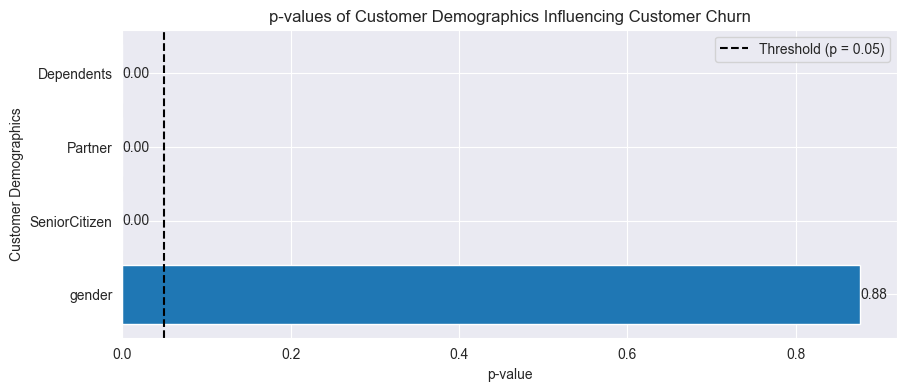

In [30]:
# Create a dataframe with the results
df = pd.DataFrame({"Variable": variables, "p-value": p_values})

# Set figure size
plt.figure(figsize = (10, 4))
# Create a bar chart
plt.barh(df["Variable"], df["p-value"])
plt.axvline(x = 0.05, color = "k", linestyle='--', label = "Threshold (p = 0.05)")
plt.title("p-values of Customer Demographics Influencing Customer Churn")
plt.xlabel("p-value")
plt.ylabel("Customer Demographics")
plt.legend()

# Annotate the bars
for i, (variable, p_value) in enumerate(zip(df["Variable"], df["p-value"])):
    plt.text(p_value, i, f"{p_value:.2f}", va="center", ha="left", fontsize=10)

plt.show()

**Key Insights:**
- **gender vs Churn**: We fail to reject the assumption that gender has no significant influence on churn. Having a p-value of 0.8765 which is greater than 0.05. Hence, there is no significant association between Gender and Churn
- **SeniorCitizen vs Churn**: We reject the assumption that SeniorCitizen has no significant influence on churn. Having a p-value of 0.0000 which is less than 0.05 indicates a very strong evidence of association between SeniorCitizen and Churn. Hence, there is a significant association between SeniorCitizen and Churn
- **Partner vs Churn**: We reject the assumption that Partner has no significant influence on churn. Having a p-value of 0.0000 which is less than 0.05 indicates strong evidence of association between Partner and Churn. Hence, there is a significant association between Partner and Churn
- **Dependents vs Churn**: We reject the assumption that Dependents has no significant influence on churn. Having a p-value of 0.0000 which is less than 0.05 indicates a very strong evidence of association between Dependents and Churn. Hence, there is a significant association between Dependents and Churn

b) Calculate the churn rate for each gender

   gender Churn  BreakDown  Rate (%)
0  Female    No       1823     73.39
1  Female   Yes        661     26.61
2    Male    No       1884     73.62
3    Male   Yes        675     26.38


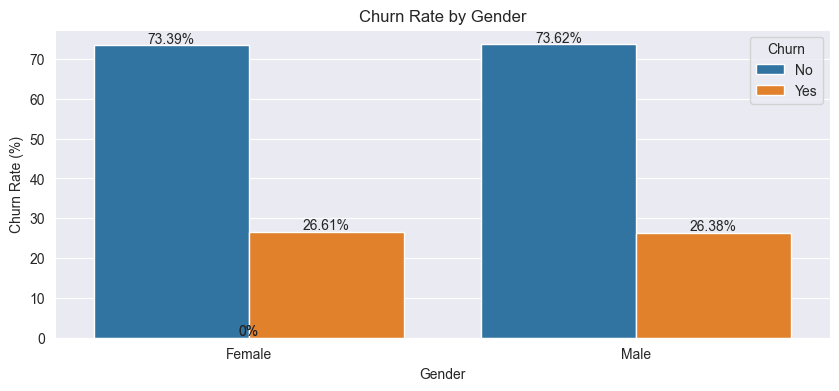

In [31]:
# Group the data by "gender" and "Churn" columns
grouped_data1 = df_copy.groupby(["gender", "Churn"])["Churn"].count().rename("BreakDown").reset_index()
# Calculate the Churn Rate for each gender group:
grouped_data1["Rate (%)"] = grouped_data1.groupby("gender")["BreakDown"].transform(lambda x: round(x/x.sum()*100, 2))
print(grouped_data1)

# Set style
sns.set_style("darkgrid")
# Create a new figure with a specified size
plt.figure(figsize=(10, 4))

# Generate a bar plot using Seaborn
sns.barplot(data=grouped_data1, x="gender", y="Rate (%)", hue="Churn")
# Set the title of the plot
plt.title("Churn Rate by Gender")
# Set the labels for the x-axis and y-axis
plt.xlabel("Gender")
plt.ylabel("Churn Rate (%)")

# Iterate over each bar in the plot
for bar in plt.gca().patches:
    # Get the height of the bar (Churn Rate value)
    height = bar.get_height()
    # Add a text label above each bar with the Churn Rate value
    plt.gca().text(bar.get_x() + bar.get_width()/2, height + 0.5, str(height) + "%", ha="center")

# Display the plot
plt.show()

**Observations:**
- The dataset shows a near equal distribution of males and females, with a slight inclination towards males compared to females.
- Females exhibit a marginally higher Churn rate 26.61% compared to males 26.38%. A significant majority of customers approximately 73% are retained, while around 26% have churned.
- Males have a slightly higher retention rate 73.62% compared to females 73.39%.

c) Calculate the churn rate for each SeniorCitizen

  SeniorCitizen Churn  BreakDown  Rate (%)
0            No    No       3228     76.42
1            No   Yes        996     23.58
2           Yes    No        479     58.49
3           Yes   Yes        340     41.51


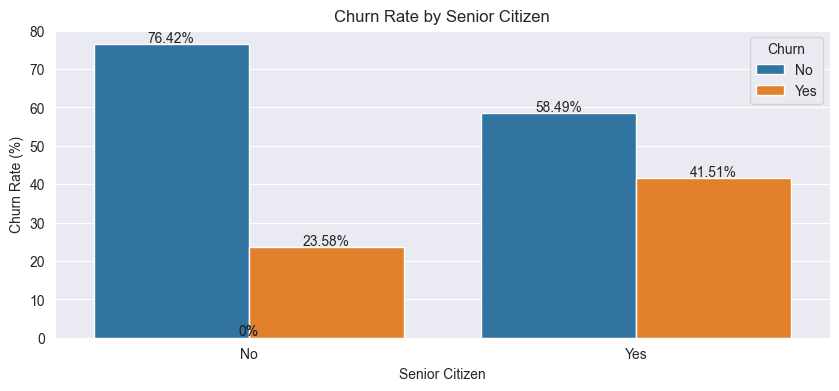

In [32]:
# Group the data by "SeniorCitizen" and "Churn" columns
grouped_data2 = df_copy.groupby(["SeniorCitizen", "Churn"])["Churn"].count().rename("BreakDown").reset_index()
# Calculate the Churn Rate for each SeniorCitizen group:
grouped_data2["Rate (%)"] = grouped_data2.groupby("SeniorCitizen")["BreakDown"].transform(lambda x: round(x/x.sum()*100, 2))
print(grouped_data2)

# Set style
sns.set_style("darkgrid")
# Create a new figure with a specified size
plt.figure(figsize=(10, 4))

# Generate a bar plot using Seaborn
sns.barplot(data=grouped_data2, x="SeniorCitizen", y="Rate (%)", hue="Churn")
# Set the title of the plot
plt.title("Churn Rate by Senior Citizen")
# Set the labels for the x-axis and y-axis
plt.xlabel("Senior Citizen")
plt.ylabel("Churn Rate (%)")

# Iterate over each bar in the plot
for bar in plt.gca().patches:
    # Get the height of the bar (Churn Rate value)
    height = bar.get_height()
    # Add a text label above each bar with the Churn Rate value
    plt.gca().text(bar.get_x() + bar.get_width()/2, height + 0.5, str(height) + "%", ha="center")

# Display the plot
plt.show()

**Observations:**
- The majority of customers (76.42%) are non-Senior Citizens who are retained.
- A significant proportion 23.58% of non-Senior Citizens have churned.
- Among Senior Citizens, 58.49% retained, while 41.51% churned.

d) Calculate the churn rate for customers with Partners

  Partner Churn  BreakDown  Rate (%)
0      No    No       1743     67.43
1      No   Yes        842     32.57
2     Yes    No       1964     79.90
3     Yes   Yes        494     20.10


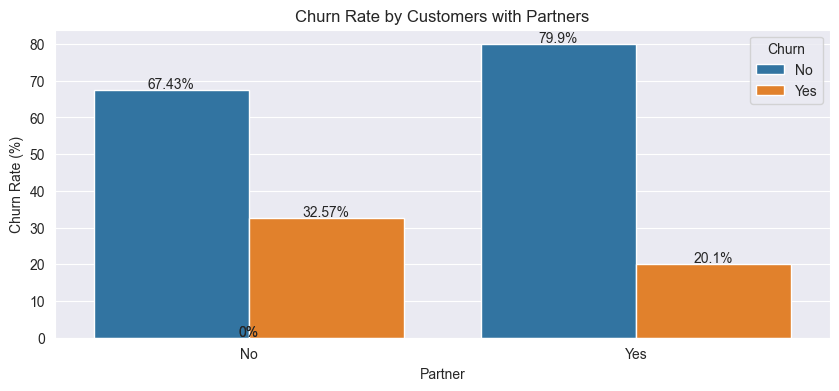

In [33]:
# Group the data by "SeniorCitizen" and "Churn" columns
grouped_data3 = df_copy.groupby(["Partner", "Churn"])["Churn"].count().rename("BreakDown").reset_index()
# Calculate the Churn Rate for each SeniorCitizen group:
grouped_data3["Rate (%)"] = grouped_data3.groupby("Partner")["BreakDown"].transform(lambda x: round(x/x.sum()*100, 2))
print(grouped_data3)

# Set style
sns.set_style("darkgrid")
# Create a new figure with a specified size
plt.figure(figsize=(10, 4))

# Generate a bar plot using Seaborn
sns.barplot(data=grouped_data3, x="Partner", y="Rate (%)", hue="Churn")
# Set the title of the plot
plt.title("Churn Rate by Customers with Partners")
# Set the labels for the x-axis and y-axis
plt.xlabel("Partner")
plt.ylabel("Churn Rate (%)")

# Iterate over each bar in the plot
for bar in plt.gca().patches:
    # Get the height of the bar (Churn Rate value)
    height = bar.get_height()
    # Add a text label above each bar with the Churn Rate value
    plt.gca().text(bar.get_x() + bar.get_width()/2, height + 0.5, str(height) + "%", ha="center")

# Display the plot
plt.show()

**Observations:**
- The majority of customers with a Partner (79.90%) are retained.
- A significant proportion of customers without a Partner (32.57%) have churned.
- Among customers with a Partner, 20.10% have churned, while 67.43% of customers without a Partner are retained.

e) Calculate the churn rate for customers with Dependents

  Dependents Churn  BreakDown  Rate (%)
0         No    No       2383     68.44
1         No   Yes       1099     31.56
2        Yes    No       1324     84.82
3        Yes   Yes        237     15.18


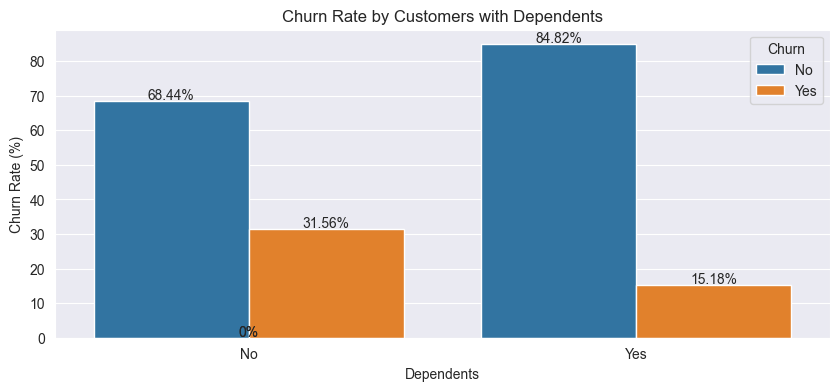

In [34]:
# Group the data by "SeniorCitizen" and "Churn" columns
grouped_data4 = df_copy.groupby(["Dependents", "Churn"])["Churn"].count().rename("BreakDown").reset_index()
# Calculate the Churn Rate for each SeniorCitizen group:
grouped_data4["Rate (%)"] = grouped_data4.groupby("Dependents")["BreakDown"].transform(lambda x: round(x/x.sum()*100, 2))
print(grouped_data4)

# Set style
sns.set_style("darkgrid")
# Create a new figure with a specified size
plt.figure(figsize = (10, 4))

# Generate a bar plot using Seaborn
sns.barplot(data = grouped_data4, x = "Dependents", y = "Rate (%)", hue = "Churn")
# Set the title of the plot
plt.title("Churn Rate by Customers with Dependents")
# Set the labels for the x-axis and y-axis
plt.xlabel("Dependents")
plt.ylabel("Churn Rate (%)")

# Iterate over each bar in the plot
for bar in plt.gca().patches:
    # Get the height of the bar (Churn Rate value)
    height = bar.get_height()
    # Add a text label above each bar with the Churn Rate value
    plt.gca().text(bar.get_x() + bar.get_width()/2, height + 0.5, str(height) + "%", ha = "center")

# Display the plot
plt.show()

**Observations:**
- From the plot, 68.44% of customers without Dependents are retained. A significant proportion of customers without Dependents (31.56%) have churned.
- Among customers with Dependents, 84.82% have retained, while 15.18% have churned.

**Key Insights**:
1. **Gender vs Churn**:<br> The Chi-Square test showed no significant association between gender and Churn (p-value = 0.8765, Chi-Square statistic = 0.024), which is consistent with the bar plot showing virtually identical Churn rates across both genders (26.61% vs 26.38%). 

2. **SeniorCitizen vs Churn**:<br> The test revealed a strong association between SeniorCitizen status and Churn (p-value < 0.05, Chi-Square statistic = 112.3851), indicating that Senior Citizens are more likely to churn. The bar plot confirms this, with a significantly higher Churn rate among Senior Citizens (41.51%) compared to non-Senior Citizens (23.58%).

3. **Partner vs Churn**:<br> The Chi-Square test indicated a significant association between having a Partner and Churn (p-value < 0.05, Chi-Square statistic = 100.048), suggesting that customers with a Partner are less likely to churn. The bar plot supports this, showing a lower Churn rate among customers with a Partner (20.10%) compared to those without partners (32.57%).

4. **Dependents vs Churn**:<br> The Chi-Square test uncovered a significant association between having Dependents and Churn (p-value < 0.05, Chi-Square statistic = 147.653), indicating that customers with Dependents are less likely to churn. The bar plot confirms this, with a lower Churn rate among customers with Dependents (15.18%) compared to those without dependents (31.56%).

**Conclusion**:<br>

Customers who possess any of the following characteristics are at a higher risk of churning:<br>
SeniorCitizen status, not having a Partner, or not having Dependents.<br>
Additionally, customers who cumulatively possess all three characteristics are likely to be at the highest risk of churning. These insights can inform targeted retention strategies to mitigate Churn and improve overall customer satisfaction




#### 2.4.2. Identify which service is associated with customer churning
a) Perform statistical test on services presumed to be associated with customer churning

In [35]:
# List of variables to analyze
services = ["PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport",
             "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod", "InternetService"]
# Target variable
target = "Churn"

# Corresponding p-values for each factor
p_values = []

# Assign the DataFrame to a variable
df = df_copy

# Iterate over the variables and create contingency tables
for service in services:
    # Chi-square test
    contingency_table = pd.crosstab(df[service], df[target])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    p_values.append(round(p, 4))

b) Visualise the test results with  horizontal bar plot

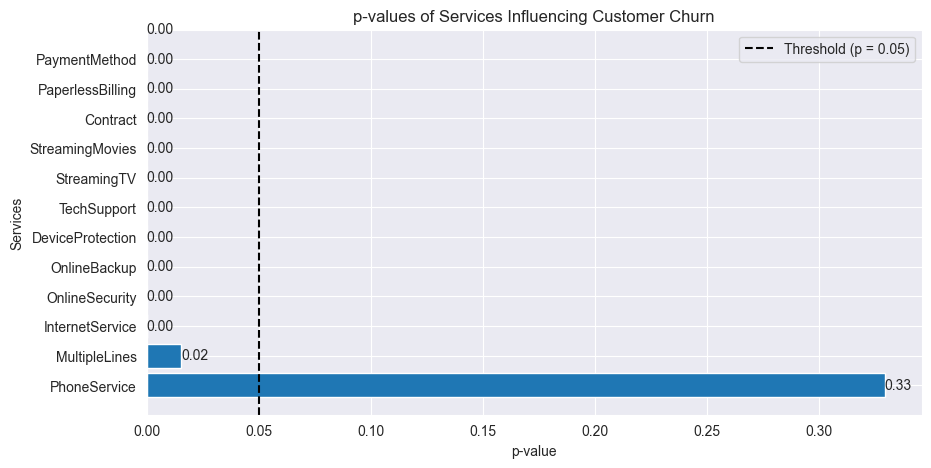

In [36]:
# Create a dataframe with the results
df = pd.DataFrame({"Variable": services, "p-value": p_values})

# Set figure size
plt.figure(figsize = (10, 5))
# Set style
sns.set_style("darkgrid")

# Create a bar chart
plt.barh(df["Variable"], df["p-value"])
plt.axvline(x = 0.05, color = "k", linestyle='--', label = "Threshold (p = 0.05)")
plt.title("p-values of Services Influencing Customer Churn")
plt.xlabel("p-value")
plt.ylabel("Services")
plt.legend()

# Annotate the bars
for i, (variable, p_value) in enumerate(zip(df["Variable"], df["p-value"])):
    plt.text(p_value, i, f"{p_value:.2f}", va="center", ha="left", fontsize=10)

plt.show()

**Observations**:<br>
1. The Chi-square test indicates a statistically significant association between the following factors and customer churn: MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, InternetService, and PaymentMethod. Each of these factors has a p-value of 0.0000, which is less than the significance level of 0.05. This suggests that these factors are strongly associated with customer churn.
2. Conversely, there is no significant association between PhoneService and churn, as indicated by a p-value of 0.33. This suggests that customers with the PhoneService subscription are not more likely to churn compared to those without this service.

#### 2.4.3. What internet services is most likely to have the most loyal customers?

Churn                  No       Yes
InternetService                    
DSL              0.819825  0.180175
Fiber optic      0.576957  0.423043
No               0.929630  0.070370


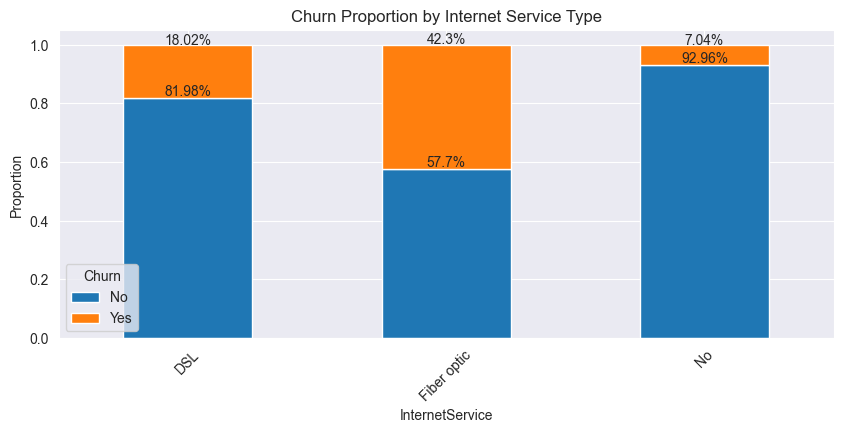

In [37]:
# Calculate churn rates by internet service type
internet_service_churn_rate = df_copy.groupby("InternetService")["Churn"].value_counts(normalize=True).unstack()
print(internet_service_churn_rate)

# Visualization
internet_service_churn_rate.plot(kind="bar", stacked = True, rot = 45, figsize = (10, 4))
plt.title("Churn Proportion by Internet Service Type")
plt.ylabel("Proportion")

# Add data point to corresponding bars
for i, bar in enumerate(plt.gca().patches):
    height = bar.get_height()
    width = bar.get_width()
    x, y = bar.get_xy()
    plt.annotate(f"{round(float(height)*100, 2)}%", (x + width/2, y + height*1.01), ha = "center")

plt.show()

**Observations**:
- The Chi-square test indicates a statistically significant association between InternetService and Churn, with a p-value of 0.0000, which is less than the significance level of 0.05. This suggests that the type of InternetService is likely to influence customer retention.
- DSL subscribers have a lower Churn rate (0.180175 or 18.02%), which is lower than the overall Churn rate.
- Fiber optic subscribers have a higher Churn rate (0.423043 or 42.30%), which is higher than the overall Churn rate.
- Customers without InternetService have a very low Churn rate (0.070370 or 7.04%), which is significantly lower than the overall Churn rate.

**Insights**:<br>
- InternetService type may be a significant factor in Churn, with DSL subscribers being more loyal or satisfied, and fiber optic subscribers being more prone to Churn.
- Customers without InternetService may be less reliant on the company, indicating a lower risk of Churn.


#### 2.4.4. What is the reason behind a particular internet service recording high churn rate?

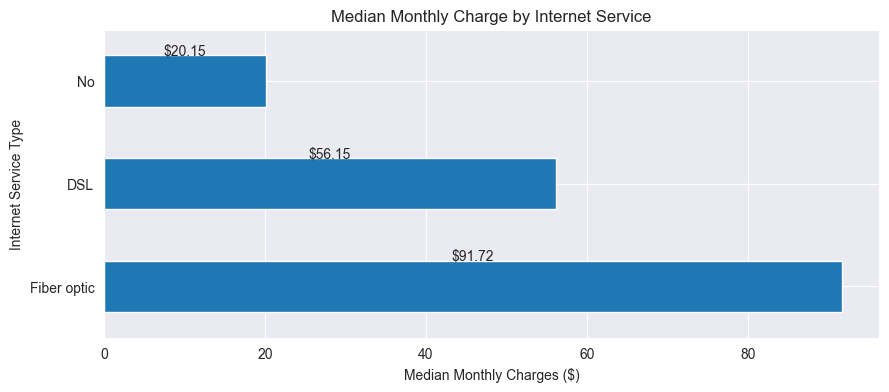

In [38]:
# Calculate the median monthly charges grouped by Internet service type
monthly_charge_by_median = df_copy.groupby(["InternetService"])["MonthlyCharges"].median().sort_values(ascending=False)

# Set style for the seaborn plots
sns.set_style("darkgrid")
# Plot the median monthly charges as a horizontal bar chart
monthly_charge_by_median.plot(kind="barh", figsize=(10, 4))

# Label the axis
plt.xlabel("Median Monthly Charges ($)")
plt.ylabel("Internet Service Type")
plt.title("Median Monthly Charge by Internet Service")

# Annotate the bars with the median values
for i, bar in enumerate(plt.gca().patches):
     # Get the height of the bar
    height = bar.get_height()
    # Get the width of the bar (median value)
    width = bar.get_width()
    # Get the x and y coordinates of the bar
    x, y = bar.get_xy()        
    # Annotate the bar with the median value, positioned slightly above the bar
    plt.annotate(f"${round(float(width), 2)}", (x + width/2, y + height*1.01), ha="center")

# Display the plot
plt.show()


**Observations**:<br>
- The median monthly charges vary significantly across different InternetService types.
- Fiber optic subscribers pay the most: The median monthly charge for fiber optic subscribers ($91.72) is significantly higher than the other two groups.
- DSL subscribers pay moderately: The median monthly charge for DSL subscribers ($56.15) is lower than fiber optic but higher than those without InternetService.
- Customers without InternetService pay the least: The median monthly charge for customers without InternetService ($20.15) is the lowest among the three groups.

**Insights**:<br>
- Price sensitivity: Fiber optic subscribers may be more price-sensitive and churn when they feel the cost is too high.
- Value perception: Despite the higher speed and quality of fiber optic internet, subscribers may not perceive the value as worth the extra cost.
- Competitive offerings: Other internet service providers may be offering similar or better fiber optic plans at a lower price, pulling away subscribers.

**Recommendations**:<br>
- Pricing strategy: The company may need to revisit its pricing strategy for fiber optic plans to ensure it's competitive and aligned with customer perceived value.
- Retention strategies: The company may need to develop retention strategies specifically for fiber optic subscribers, such as loyalty programs or bundled offers, to reduce churn.


#### 2.4.5. How does tenure influence customer churn?
Plot line chart to visualize churn variation against turner

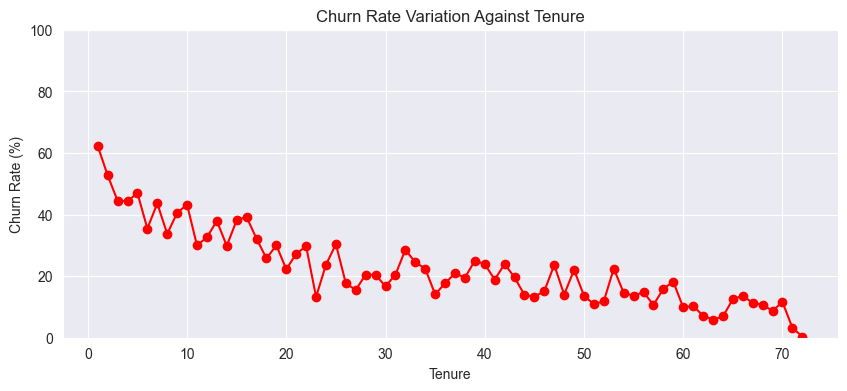

In [39]:
# Calculate churn rates by tenure
tenure_churn_rate = (df_copy.groupby("tenure")["Churn"].value_counts(normalize=True).unstack()*100)

# Plot a line chart of churn
plot = tenure_churn_rate["Yes"].plot(kind = "line", figsize = (10, 4), color = "red", marker = "o")
# Adding title and labels
plt.xlabel("Tenure")
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate Variation Against Tenure")
# Set y-axis limit between 0 and 100
plot.set_ylim(0, 100)

# Display the plot
plt.show()


**Observations**:<br>
- The churn rate is highest for customers with very low tenure (around 0 to 1 months), reaching above 60%.
Decreasing Trend:
- There is a general decreasing trend in the churn rate as tenure increases. Customers with longer tenures tend to churn less.
- Despite the overall decreasing trend, there are fluctuations in the churn rate at various tenure points. This indicates that while tenure generally reduces churn, other factors might influence churn rates at specific intervals.

### 2.5. Hypothesis Testing
**Null Hypothesis (Ho)**: The total amount charged to a customer has no statistical significant influence on wether the customer will churn or not 

**Alternate Hypothesis (Ha)**: The total amount charged to a customer has statistical significant influence on whether the customer will churn or not.<br>
**Take ($\alpha$)** = 0.05


In [42]:
# Select the "TotalCharges" values where the customer churned (Churn == "Yes")
churn_yes = df_copy[df_copy["Churn"] == "Yes"]["TotalCharges"]
# Select the "TotalCharges" values where the customer did not churn (Churn == "No")
churn_no = df_copy[df_copy["Churn"] == "No"]["TotalCharges"]
# Perform the Mann-Whitney U test to compare the distributions of TotalCharges between churned and non-churned customers
U, p = mannwhitneyu(churn_yes, churn_no)

# Print the results of the Mann-Whitney U test
print("Mann-Whitney U statistic:", U)
print("p-value:", p)


Mann-Whitney U statistic: 1739051.0
p-value: 9.970211412915064e-59


## 3. Data Preparation 

# Check this later .................................................
Actionable Steps:
Retention Strategies for Early Tenure Customers: Focus on customers within their first 20 months with tailored offers or enhanced support to reduce early churn.
Evaluate Pricing Plans: Ensure that higher-charged plans provide sufficient value to maintain low churn rates.
Segment Analysis: Perform deeper analysis on different customer segments to understand their specific needs and behaviors.
